## Assignment 3 - Dimensionality Reduction

This assignment is based on content discussed in module 6 and will work with the famous MNIST dataset, which is a set of images of handwritten digits https://en.wikipedia.org/wiki/MNIST_database.
The dataset has been provided to you in a .csv file.

## Learning outcomes

- Apply a Random Forest classification algorithm to MNIST dataset
- Perform dimensionality reduction of features using PCA and compare classification on the reduced dataset to that of original one
- Apply dimensionality reduction techniques: t-SNE and LLE

## Questions (15 points total)

__Question 1 (1 point).__ Load the MNIST dataset and split it into a training set and a test set (take the first 60,000 instances for training, and the remaining 10,000 for testing).

In [1]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('mnist_dataset.csv')
df.head()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 786 entries, Unnamed: 0 to 28x28
dtypes: int64(786)
memory usage: 419.8 MB


In [3]:

df.keys()

Index(['Unnamed: 0', 'label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7',
       '1x8',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=786)

In [4]:
df.shape

(70000, 786)

In [5]:
df_explore = df.copy()
df_explore.dtypes

Unnamed: 0    int64
label         int64
1x1           int64
1x2           int64
1x3           int64
              ...  
28x24         int64
28x25         int64
28x26         int64
28x27         int64
28x28         int64
Length: 786, dtype: object

In [6]:
pixels = pd.DataFrame(df)
labels = pd.DataFrame(df.label)

In [7]:
pixels.loc[0].values

array([  0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  10, 111, 190, 242, 253, 191,
        63,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   4,  25, 111, 227, 252, 252, 252,
       252, 253, 228,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  91, 170, 252, 252, 25

In [8]:
labels.loc[0].values

array([2], dtype=int64)

In [9]:
df.corr()

,Unnamed: 0,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
Unnamed: 0,1.000000,-0.003485,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.002241,0.000024,0.001680,0.001955,-0.002040,-0.002843,NaN,NaN,NaN,NaN
label,-0.003485,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.031419,0.023704,0.019083,0.012567,0.008648,0.004709,NaN,NaN,NaN,NaN
1x1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1x3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28x24,-0.002843,0.004709,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.000176,-0.000125,-0.000089,0.206548,0.855512,1.000000,NaN,NaN,NaN,NaN
28x25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28x27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
X = df.drop(axis=1,columns="Unnamed: 0")
X = X.drop(axis=1,columns="label")
Y = df['label']

In [14]:
X.shape, Y.shape

((70000, 784), (70000,))

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1.0/7)

In [16]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

__Question 2 (2 points).__ Train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set.

In [17]:
from sklearn.ensemble import RandomForestClassifier
from time import time
start_time = time()
model = RandomForestClassifier()
model.fit(X_train, Y_train)
end_time = time()
print("Spent time to fit:",end_time-start_time,"secs")

Spent time to fit: 43.7904269695282 secs


In [18]:
from sklearn.metrics import f1_score
y_pred = model.predict(X_test)
f1_score(y_pred,Y_test,average='macro')

0.9711982697837798

__Question 3 (4 points).__ Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
x = np.concatenate((X_train, X_test), axis=0)
x = StandardScaler().fit_transform(x)
n_components = 0.95
pca = PCA(n_components)
pca.fit(x)
pca.n_components_

332

In [20]:
x_pca = pca.transform(x)
x_pca.shape

(70000, 332)

In [22]:
X_train_pca = x_pca[0:60000, :]
X_test_pca = x_pca[60000:, :] 

In [23]:
X_train_pca = X_train_pca.astype(int)
X_test_pca = X_test_pca.astype(int)

In [24]:
start_time = time()
model2 = RandomForestClassifier()
model2.fit(X_train_pca, Y_train)
end_time = time()
print("Spent time to fit:",end_time-start_time,"secs")
y_pred2 = model2.predict(X_test_pca)

Spent time to fit: 24.9240403175354 secs


In [25]:
f1_score(y_pred2, Y_test, average='macro')

0.9415376609861215

Using PCA with 95% variance make the fit process faster but the score is worse

__Question 4 (4 points).__ Use t-SNE to reduce the MNIST dataset, show result graphically.

In [26]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 2, random_state=0)
#tsne_res = tsne.fit_transform(X_train])
# due to the lack of computer resource and TSNE, used 3000 data to look at TSNE result
start_time = time()
tsne_res = tsne.fit_transform(X_train[0:2000])
print("Spent time TSNE:",time()-start_time,"secs")

Spent time TSNE: 20.85737156867981 secs


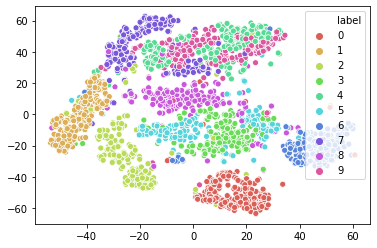

In [27]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue=Y_train[0:2000],palette = sns.hls_palette(10), legend = 'full')

__Question 5 (4 points).__ Compare with other dimensionality methods: _Locally Linear Embedding_ (LLE) or _Multidimensional scaling_ (MDS).

Multidimensional Scaling (MDS) is another local dimensionality reduction technique, which preserves the distances 
between the data points.

Isomap is based on the analysis of nearest neighbours like LLE, but this time the graph connecting each instance 
to its nearest neighbours is created and then the dimensionality is reduced while trying to preserve the distances 
between nodes. It may be applied to twisted manifold, and as result both local and large scale distances might be preserved.

In [28]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
start_time = time()
lle_res = lle.fit_transform(X_train[0:2000])
print("Spent time LLE:",time()-start_time,"secs")

Spent time LLE: 7.247977256774902 secs


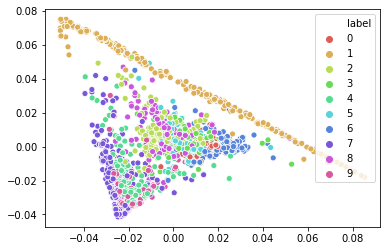

In [29]:
sns.scatterplot(x = lle_res[:,0], y = lle_res[:,1], hue = Y_train[0:2000], palette = sns.hls_palette(10), legend = 'full')

In [30]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
start_time = time()
mds_res = mds.fit_transform(X_train[0:2000])
print("Spent time MDS:",time()-start_time,"secs")

Spent time MDS: 219.04760217666626 secs


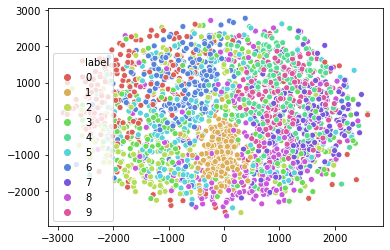

In [31]:
sns.scatterplot(x = mds_res[:,0], y = mds_res[:,1], hue = Y_train[0:2000], palette = sns.hls_palette(10), legend = 'full')

In [ ]:
TSNE has the best performance. The graph shows that every class is separated by a sufficient distance. 